# Preprocesamiento de Datos - Breast Cancer Diagnosis

Este notebook implementa el pipeline completo de preprocesamiento de datos para el proyecto de diagnóstico de cáncer de mama usando MLP vs SVM.

## Objetivo

Preparar los datos del dataset Breast Cancer Wisconsin (Diagnostic) para el entrenamiento de modelos de Machine Learning:

1. Carga de datos desde MongoDB
2. Análisis exploratorio de datos (EDA)
3. Limpieza de datos
4. Codificación de variables categóricas
5. División en conjuntos de entrenamiento y prueba
6. Normalización de características
7. Guardado de datos preprocesados

**Autor:** altairBASIC  
**Fecha:** Octubre 2025  
**Dataset:** Breast Cancer Wisconsin (Diagnostic) - 569 muestras, 30 características

## 1. Importar Bibliotecas Necesarias

In [4]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import json
import os
import warnings
from datetime import datetime

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración de pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

print("Bibliotecas importadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Bibliotecas importadas correctamente
Pandas version: 2.1.4
NumPy version: 1.26.2


## 2. Cargar Datos desde MongoDB

Conectamos a MongoDB y cargamos el dataset de cáncer de mama en un DataFrame de pandas.

In [5]:
# Conectar a MongoDB
mongo_uri = "mongodb://localhost:27017/"
db_name = "breast_cancer_db"
collection_name = "patients_records"

print(f"Conectando a MongoDB: {mongo_uri}")
client = MongoClient(mongo_uri, serverSelectionTimeoutMS=5000)

# Verificar conexión
client.admin.command('ping')
print(" Conexión exitosa a MongoDB")

# Seleccionar base de datos y colección
db = client[db_name]
collection = db[collection_name]

# Contar documentos
doc_count = collection.count_documents({})
print(f" Documentos encontrados: {doc_count}")

# Cargar datos en DataFrame
print("Cargando datos en DataFrame...")
cursor = collection.find({})
df = pd.DataFrame(list(cursor))

# Cerrar conexión
client.close()

print(f" Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")

Conectando a MongoDB: mongodb://localhost:27017/
 Conexión exitosa a MongoDB
 Documentos encontrados: 569
Cargando datos en DataFrame...
 Datos cargados: 569 filas, 34 columnas


## 3. Análisis Exploratorio de Datos (EDA)

Exploramos la estructura de los datos para entender mejor nuestro dataset.

In [6]:
# Información general del dataset
print("="*70)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*70)
print(f"\nDimensiones: {df.shape}")
print(f"Número de columnas: {len(df.columns)}")
print(f"\nPrimeras 5 filas:")
df.head()

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: (569, 34)
Número de columnas: 34

Primeras 5 filas:


,_id,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis,inserted_at,source
0,68faf70d94f0c8b53151b2fc,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,M,2025-10-24 00:48:29.052,UCI Machine Learning Repository
1,68faf70d94f0c8b53151b2fd,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890,M,2025-10-24 00:48:29.052,UCI Machine Learning Repository
2,68faf70d94f0c8b53151b2fe,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876,M,2025-10-24 00:48:29.052,UCI Machine Learning Repository
3,68faf70d94f0c8b53151b2ff,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,M,2025-10-24 00:48:29.052,UCI Machine Learning Repository
4,68faf70d94f0c8b53151b300,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768,M,2025-10-24 00:48:29.052,UCI Machine Learning Repository


In [7]:
# Información de tipos de datos
print("\nTIPOS DE DATOS:")
print(df.dtypes.value_counts())

print("\nINFORMACIÓN DETALLADA:")
df.info()


TIPOS DE DATOS:
float64           30
object             3
datetime64[ns]     1
Name: count, dtype: int64

INFORMACIÓN DETALLADA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   _id                      569 non-null    object        
 1   mean radius              569 non-null    float64       
 2   mean texture             569 non-null    float64       
 3   mean perimeter           569 non-null    float64       
 4   mean area                569 non-null    float64       
 5   mean smoothness          569 non-null    float64       
 6   mean compactness         569 non-null    float64       
 7   mean concavity           569 non-null    float64       
 8   mean concave points      569 non-null    float64       
 9   mean symmetry            569 non-null    float64       
 10  mean fractal dimension   569

In [18]:
# Valores faltantes
print("\nVALORES FALTANTES:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print(" No hay valores faltantes en el dataset")
else:
    missing_df = pd.DataFrame({
        'Columna': missing[missing > 0].index,
        'Valores Faltantes': missing[missing > 0].values,
        'Porcentaje': (missing[missing > 0].values / len(df)) * 100
    })
    print(missing_df)


VALORES FALTANTES:
 No hay valores faltantes en el dataset



DISTRIBUCIÓN DE DIAGNÓSTICO:

Conteo:
   B (Benigno): 357 (62.74%)
   M (Maligno): 212 (37.26%)


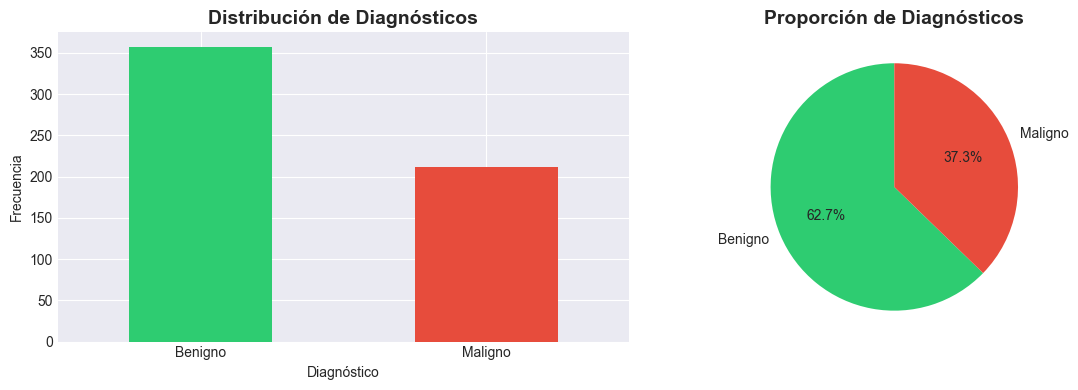

In [9]:
# Distribución de la variable objetivo
print("\nDISTRIBUCIÓN DE DIAGNÓSTICO:")
if 'diagnosis' in df.columns:
    diagnosis_dist = df['diagnosis'].value_counts()
    total = len(df)
    
    print("\nConteo:")
    for diagnosis, count in diagnosis_dist.items():
        pct = (count / total) * 100
        label = "Benigno" if diagnosis == 'B' else "Maligno"
        print(f"   {diagnosis} ({label}): {count} ({pct:.2f}%)")
    
    # Visualización
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Gráfico de barras
    diagnosis_dist.plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c'])
    ax[0].set_title('Distribución de Diagnósticos', fontsize=14, fontweight='bold')
    ax[0].set_xlabel('Diagnóstico')
    ax[0].set_ylabel('Frecuencia')
    ax[0].set_xticklabels(['Benigno', 'Maligno'], rotation=0)
    
    # Gráfico de pastel
    ax[1].pie(diagnosis_dist.values, labels=['Benigno', 'Maligno'], 
              autopct='%1.1f%%', startangle=90, colors=['#2ecc71', '#e74c3c'])
    ax[1].set_title('Proporción de Diagnósticos', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [10]:
# Estadísticas descriptivas de características numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['_id', 'id']]

print(f"\nESTADÍSTICAS DE CARACTERÍSTICAS NUMÉRICAS:")
print(f"Número de características numéricas: {len(numeric_cols)}")

# Mostrar estadísticas
stats = df[numeric_cols].describe()
print("\nEstadísticas descriptivas:")
stats


ESTADÍSTICAS DE CARACTERÍSTICAS NUMÉRICAS:
Número de características numéricas: 30

Estadísticas descriptivas:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000
mean,14.1273,19.2896,91.9690,654.8891,0.0964,0.1043,0.0888,0.0489,0.1812,0.0628,0.4052,1.2169,2.8661,40.3371,0.0070,0.0255,0.0319,0.0118,0.0205,0.0038,16.2692,25.6772,107.2612,880.5831,0.1324,0.2543,0.2722,0.1146,0.2901,0.0839
std,3.5240,4.3010,24.2990,351.9141,0.0141,0.0528,0.0797,0.0388,0.0274,0.0071,0.2773,0.5516,2.0219,45.4910,0.0030,0.0179,0.0302,0.0062,0.0083,0.0026,4.8332,6.1463,33.6025,569.3570,0.0228,0.1573,0.2086,0.0657,0.0619,0.0181
min,6.9810,9.7100,43.7900,143.5000,0.0526,0.0194,0.0000,0.0000,0.1060,0.0500,0.1115,0.3602,0.7570,6.8020,0.0017,0.0023,0.0000,0.0000,0.0079,0.0009,7.9300,12.0200,50.4100,185.2000,0.0712,0.0273,0.0000,0.0000,0.1565,0.0550
25%,11.7000,16.1700,75.1700,420.3000,0.0864,0.0649,0.0296,0.0203,0.1619,0.0577,0.2324,0.8339,1.6060,17.8500,0.0052,0.0131,0.0151,0.0076,0.0152,0.0022,13.0100,21.0800,84.1100,515.3000,0.1166,0.1472,0.1145,0.0649,0.2504,0.0715
50%,13.3700,18.8400,86.2400,551.1000,0.0959,0.0926,0.0615,0.0335,0.1792,0.0615,0.3242,1.1080,2.2870,24.5300,0.0064,0.0204,0.0259,0.0109,0.0187,0.0032,14.9700,25.4100,97.6600,686.5000,0.1313,0.2119,0.2267,0.0999,0.2822,0.0800
75%,15.7800,21.8000,104.1000,782.7000,0.1053,0.1304,0.1307,0.0740,0.1957,0.0661,0.4789,1.4740,3.3570,45.1900,0.0081,0.0324,0.0420,0.0147,0.0235,0.0046,18.7900,29.7200,125.4000,1084.0000,0.1460,0.3391,0.3829,0.1614,0.3179,0.0921
max,28.1100,39.2800,188.5000,2501.0000,0.1634,0.3454,0.4268,0.2012,0.3040,0.0974,2.8730,4.8850,21.9800,542.2000,0.0311,0.1354,0.3960,0.0528,0.0790,0.0298,36.0400,49.5400,251.2000,4254.0000,0.2226,1.0580,1.2520,0.2910,0.6638,0.2075


## 4. Limpieza de Datos

Eliminamos columnas innecesarias, duplicados y valores faltantes.

In [11]:
print("="*70)
print("LIMPIEZA DE DATOS")
print("="*70)

original_shape = df.shape
print(f"\nForma original: {original_shape}")

# Eliminar columnas innecesarias
columns_to_drop = ['_id', 'inserted_at', 'source']
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_cols_to_drop:
    df = df.drop(columns=existing_cols_to_drop)
    print(f" Columnas eliminadas: {existing_cols_to_drop}")

# Eliminar duplicados
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
    print(f" Duplicados eliminados: {duplicates}")
else:
    print(f" No se encontraron duplicados")

# Eliminar filas con valores faltantes
missing_rows = df.isnull().any(axis=1).sum()
if missing_rows > 0:
    df = df.dropna()
    print(f" Filas con valores faltantes eliminadas: {missing_rows}")
else:
    print(f" No hay filas con valores faltantes")

print(f"\nForma final: {df.shape}")
print(f"Reducción: {original_shape[0] - df.shape[0]} filas, {original_shape[1] - df.shape[1]} columnas")

LIMPIEZA DE DATOS

Forma original: (569, 34)
 Columnas eliminadas: ['_id', 'inserted_at', 'source']
 No se encontraron duplicados
 No hay filas con valores faltantes

Forma final: (569, 31)
Reducción: 0 filas, 3 columnas


## 5. Codificación de Variables Categóricas

Convertimos la variable objetivo 'diagnosis' de categórica (B/M) a numérica (0/1).

In [12]:
print("="*70)
print("CODIFICACIÓN DE ETIQUETAS")
print("="*70)

# Crear codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar diagnosis
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])

# Mostrar mapeo
print("\n Codificación de diagnóstico:")
for i, label in enumerate(label_encoder.classes_):
    diagnosis_name = "Benigno" if label == 'B' else "Maligno"
    print(f"   {label} ({diagnosis_name}) -> {i}")

# Crear directorio si no existe
os.makedirs('../models/scalers', exist_ok=True)

# Guardar el codificador
encoder_path = '../models/scalers/label_encoder.pkl'
joblib.dump(label_encoder, encoder_path)
print(f"\n Label Encoder guardado en: {encoder_path}")

# Verificar codificación
print("\nVerificación:")
print(df[['diagnosis', 'diagnosis_encoded']].value_counts().sort_index())

CODIFICACIÓN DE ETIQUETAS

 Codificación de diagnóstico:
   B (Benigno) -> 0
   M (Maligno) -> 1

 Label Encoder guardado en: ../models/scalers/label_encoder.pkl

Verificación:
diagnosis  diagnosis_encoded
B          0                    357
M          1                    212
Name: count, dtype: int64


## 6. División de Datos

Separamos los datos en conjuntos de entrenamiento (80%) y prueba (20%).

In [19]:
print("="*70)
print("DIVISIÓN DE DATOS")
print("="*70)

# Separar características (X) y variable objetivo (y)
exclude_cols = ['diagnosis', 'diagnosis_encoded', 'id', 'Unnamed: 32']

feature_names = [col for col in df.columns 
                  if col not in exclude_cols and 
                  df[col].dtype in [np.float64, np.int64]]

X = df[feature_names].values
y = df['diagnosis_encoded'].values

print(f"\n Características seleccionadas: {len(feature_names)}")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

# Dividir datos (80% entrenamiento, 20% prueba)
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)

print(f"\n División completada:")
print(f"   Conjunto de entrenamiento: {X_train.shape[0]} muestras ({(1-test_size)*100:.0f}%)")
print(f"   Conjunto de prueba: {X_test.shape[0]} muestras ({test_size*100:.0f}%)")

# Verificar distribución de clases
train_dist = np.bincount(y_train)
test_dist = np.bincount(y_test)

print(f"\n Distribución de clases en entrenamiento:")
print(f"   Benigno (0): {train_dist[0]} ({train_dist[0]/len(y_train)*100:.2f}%)")
print(f"   Maligno (1): {train_dist[1]} ({train_dist[1]/len(y_train)*100:.2f}%)")

print(f"\n Distribución de clases en prueba:")
print(f"   Benigno (0): {test_dist[0]} ({test_dist[0]/len(y_test)*100:.2f}%)")
print(f"   Maligno (1): {test_dist[1]} ({test_dist[1]/len(y_test)*100:.2f}%)")

DIVISIÓN DE DATOS

 Características seleccionadas: 30
Forma de X: (569, 30)
Forma de y: (569,)

 División completada:
   Conjunto de entrenamiento: 455 muestras (80%)
   Conjunto de prueba: 114 muestras (20%)

 Distribución de clases en entrenamiento:
   Benigno (0): 285 (62.64%)
   Maligno (1): 170 (37.36%)

 Distribución de clases en prueba:
   Benigno (0): 72 (63.16%)
   Maligno (1): 42 (36.84%)


## 7. Normalización de Características

Aplicamos StandardScaler para estandarizar las características (media=0, desviación estándar=1).

In [20]:
print("="*70)
print("ESCALADO DE CARACTERÍSTICAS")
print("="*70)

# Crear y ajustar el scaler
scaler = StandardScaler()

# Ajustar solo con datos de entrenamiento
scaler.fit(X_train)

# Transformar ambos conjuntos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Características estandarizadas (StandardScaler)")

# Verificar estadísticas
train_mean = np.mean(X_train_scaled, axis=0)
train_std = np.std(X_train_scaled, axis=0)

print(f"\n Estadísticas después del escalado:")
print(f"   Media de características (train): min={train_mean.min():.6f}, max={train_mean.max():.6f}")
print(f"   Desv. est. de características (train): min={train_std.min():.6f}, max={train_std.max():.6f}")

# Guardar el scaler
scaler_path = '../models/scalers/standard_scaler.pkl'
joblib.dump(scaler, scaler_path)
print(f"\n Scaler guardado en: {scaler_path}")

ESCALADO DE CARACTERÍSTICAS

 Características estandarizadas (StandardScaler)

 Estadísticas después del escalado:
   Media de características (train): min=-0.000000, max=0.000000
   Desv. est. de características (train): min=1.000000, max=1.000000

 Scaler guardado en: ../models/scalers/standard_scaler.pkl


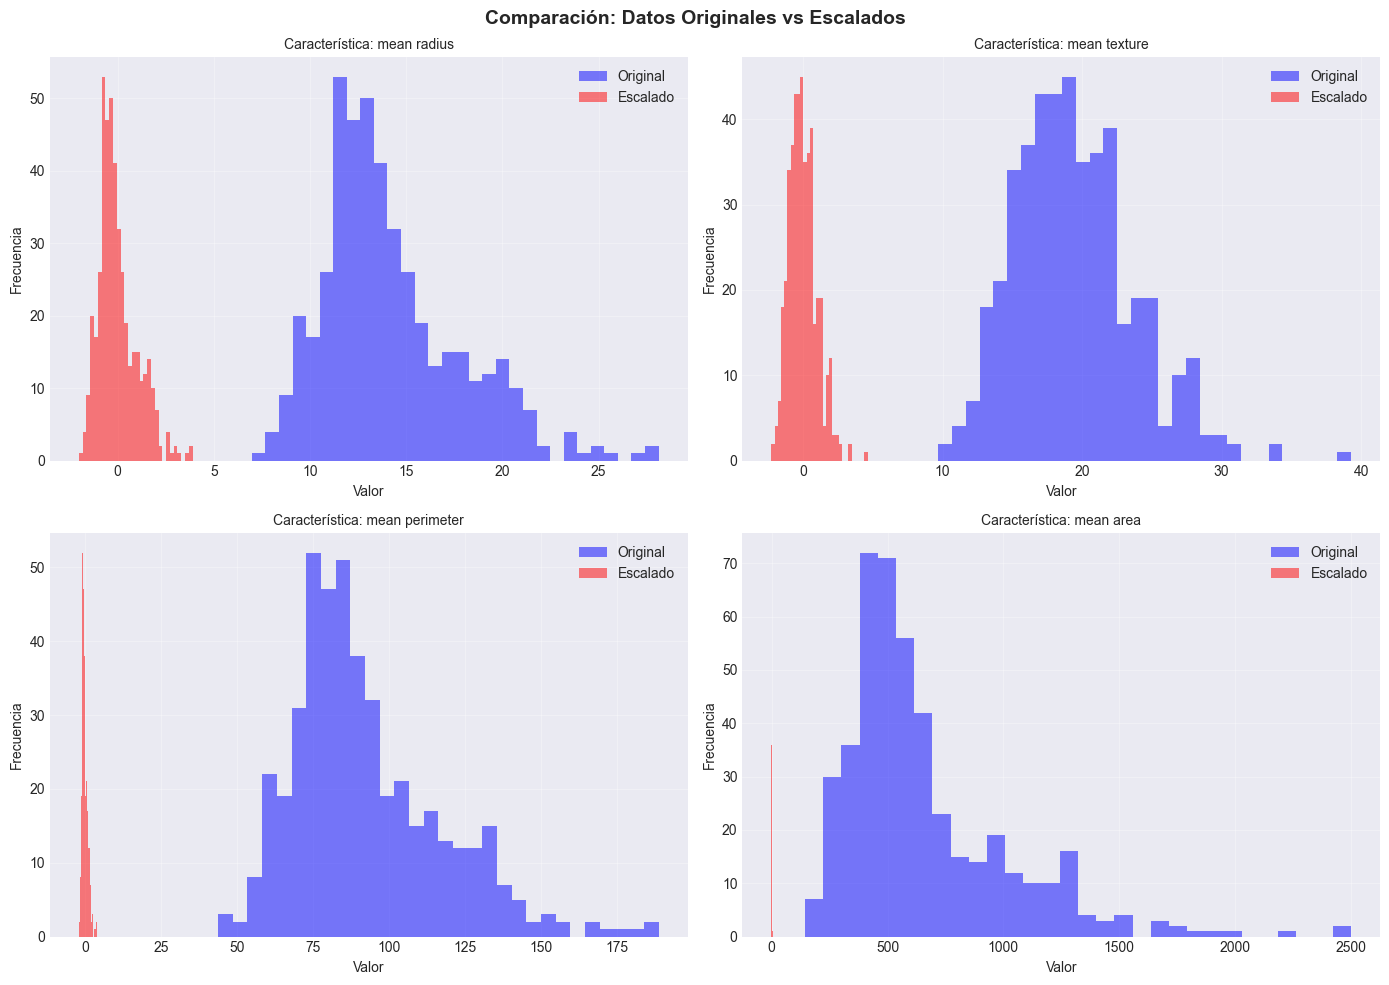

In [15]:
# Visualizar distribución antes y después del escalado
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Seleccionar algunas características para visualizar
sample_features = [0, 1, 2, 3]  # Primeras 4 características

for idx, feature_idx in enumerate(sample_features):
    row = idx // 2
    col = idx % 2
    
    ax = axes[row, col]
    
    # Antes del escalado
    ax.hist(X_train[:, feature_idx], bins=30, alpha=0.5, label='Original', color='blue')
    # Después del escalado
    ax.hist(X_train_scaled[:, feature_idx], bins=30, alpha=0.5, label='Escalado', color='red')
    
    ax.set_title(f'Característica: {feature_names[feature_idx]}', fontsize=10)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.legend()
    ax.grid(alpha=0.3)

plt.suptitle('Comparación: Datos Originales vs Escalados', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Guardar Datos Preprocesados

Guardamos los datos preprocesados para uso posterior en el entrenamiento de modelos.

In [16]:
print("="*70)
print("GUARDADO DE DATOS PREPROCESADOS")
print("="*70)

# Crear directorio si no existe
os.makedirs('../data/processed', exist_ok=True)

# Guardar arrays de numpy
np.save('../data/processed/X_train.npy', X_train_scaled)
np.save('../data/processed/X_test.npy', X_test_scaled)
np.save('../data/processed/y_train.npy', y_train)
np.save('../data/processed/y_test.npy', y_test)

print("\n Arrays guardados:")
print("   - ../data/processed/X_train.npy")
print("   - ../data/processed/X_test.npy")
print("   - ../data/processed/y_train.npy")
print("   - ../data/processed/y_test.npy")

# Guardar nombres de características
feature_info = {
    'feature_names': feature_names,
    'n_features': len(feature_names),
    'n_train_samples': X_train_scaled.shape[0],
    'n_test_samples': X_test_scaled.shape[0],
    'preprocessing_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

with open('../data/processed/feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=4)

print("\n Información de características guardada en: ../data/processed/feature_info.json")

# Guardar resumen en CSV para inspección
train_df = pd.DataFrame(X_train_scaled, columns=feature_names)
train_df['diagnosis'] = y_train
train_df.to_csv('../data/processed/train_data.csv', index=False)

test_df = pd.DataFrame(X_test_scaled, columns=feature_names)
test_df['diagnosis'] = y_test
test_df.to_csv('../data/processed/test_data.csv', index=False)

print("\n Datos en formato CSV guardados:")
print("   - ../data/processed/train_data.csv")
print("   - ../data/processed/test_data.csv")

GUARDADO DE DATOS PREPROCESADOS

 Arrays guardados:
   - ../data/processed/X_train.npy
   - ../data/processed/X_test.npy
   - ../data/processed/y_train.npy
   - ../data/processed/y_test.npy

 Información de características guardada en: ../data/processed/feature_info.json

 Datos en formato CSV guardados:
   - ../data/processed/train_data.csv
   - ../data/processed/test_data.csv


## 9. Resumen del Preprocesamiento

Generamos un reporte completo con toda la información del preprocesamiento realizado.

In [17]:
# Generar reporte completo
report = {
    "fecha_procesamiento": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "datos_originales": {
        "total_registros": len(df),
        "total_caracteristicas": len(df.columns)
    },
    "datos_procesados": {
        "caracteristicas_seleccionadas": len(feature_names),
        "nombres_caracteristicas": feature_names,
        "entrenamiento": {
            "total_muestras": X_train_scaled.shape[0],
            "clase_0_benigno": int(np.sum(y_train == 0)),
            "clase_1_maligno": int(np.sum(y_train == 1))
        },
        "prueba": {
            "total_muestras": X_test_scaled.shape[0],
            "clase_0_benigno": int(np.sum(y_test == 0)),
            "clase_1_maligno": int(np.sum(y_test == 1))
        }
    },
    "transformaciones": {
        "escalado": "StandardScaler",
        "codificacion": "LabelEncoder (B->0, M->1)"
    }
}

# Guardar reporte
report_path = '../data/processed/preprocessing_report.json'
with open(report_path, 'w') as f:
    json.dump(report, f, indent=4)

print("="*70)
print("RESUMEN DEL PREPROCESAMIENTO")
print("="*70)
print(f"\n Reporte guardado en: {report_path}")
print(f"\nCaracterísticas procesadas: {report['datos_procesados']['caracteristicas_seleccionadas']}")
print(f"Muestras de entrenamiento: {report['datos_procesados']['entrenamiento']['total_muestras']}")
print(f"Muestras de prueba: {report['datos_procesados']['prueba']['total_muestras']}")
print(f"Método de escalado: {report['transformaciones']['escalado']}")

print("\n" + "="*70)
print(" PREPROCESAMIENTO COMPLETADO EXITOSAMENTE")
print("="*70)

RESUMEN DEL PREPROCESAMIENTO

 Reporte guardado en: ../data/processed/preprocessing_report.json

Características procesadas: 30
Muestras de entrenamiento: 455
Muestras de prueba: 114
Método de escalado: StandardScaler

 PREPROCESAMIENTO COMPLETADO EXITOSAMENTE


## Conclusiones

El preprocesamiento de datos se ha completado exitosamente. Los datos están listos para el entrenamiento de modelos de Machine Learning.

### Archivos Generados:

**Datos preprocesados:**
- `data/processed/X_train.npy` - Características de entrenamiento (455 muestras)
- `data/processed/X_test.npy` - Características de prueba (114 muestras)
- `data/processed/y_train.npy` - Etiquetas de entrenamiento
- `data/processed/y_test.npy` - Etiquetas de prueba
- `data/processed/train_data.csv` - Datos de entrenamiento en formato CSV
- `data/processed/test_data.csv` - Datos de prueba en formato CSV

**Transformadores:**
- `models/scalers/standard_scaler.pkl` - Scaler para normalización
- `models/scalers/label_encoder.pkl` - Encoder para etiquetas

**Metadatos:**
- `data/processed/feature_info.json` - Información de características
- `data/processed/preprocessing_report.json` - Reporte completo del preprocesamiento

### Próximos Pasos:

1. Entrenar modelo MLP (Multi-Layer Perceptron)
2. Entrenar modelo SVM (Support Vector Machine)
3. Evaluar y comparar ambos modelos
4. Optimizar hiperparámetros
5. Generar reportes de desempeño